Student performance indicator 

Life  cycle of ML project

1)understanding the problem statement

2)data collection

3)data checks to perform

4)data pre-processing

5)Model training

6)choose best model

1)Problem Statement

This project  understands how the student's performance(test scores)is affected by other variables such as Gender,Ethinicity,Parental level of education,Lunch adn Test preparaton course


2)Data Collection

->Data source-kaagle students performance in exams
->the data consists of 8 coloumn and 1000 rows

2.1 Import Data and Required Packages

Importing Pandas,Numpy,Matplotlib,Seabon and Warings Library.

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Import the CSV Data as Pandas DataFrame

In [28]:
df=pd.read_csv('data/Students.csv')

show top 5 records

In [29]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [30]:
df.shape

(1000, 8)

2.2 Dataset information

1)gender:sex of students ->(Male/female)

2)race/ethinicity:ethinicity of students->(Group A,B,C,D,E)

3)parental level of education:parent's final education->(bachelor's degree,some college,master's degree,associate's degree,high school)

4)lunch:having lunch before test(standard or free/reduced)

5)test preparation course: complete or not complete before test

6)math score

7)reading score

8)writing score


3.Data Checks to perfom 

1)check Missing values

2)check duplicates 

3)check data type

4)check the number of unique values

5)check statistics of data set

6)check various categories present in the different categorical column


3.1 check missing values

In [31]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

3.2 Check duplicate rows

In [32]:

df.duplicated().sum()

np.int64(0)

3.3 check data types

In [33]:
#check null and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


3.4 check the number of unique values of each column

In [34]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

3.5 Check statistics of dataset

In [35]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


3.6 Exploring Data

In [36]:
print("Categories in 'gender' variable: ",end=" ")
print(df['gender'].unique())
print("Categories in 'race/ethnicity' variable: ",end=" ")
print(df['race/ethnicity'].unique())
print("Categories in 'parental level of education' variable: ",end=" ")
print(df['parental level of education'].unique())
print("Categories in 'lunch' variable: ",end=" ") 
print(df['lunch'].unique())
print("Categories in 'test preparation course' variable: ",end=" ")
print(df['test preparation course'].unique())

Categories in 'gender' variable:  ['female' 'male']
Categories in 'race/ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'test preparation course' variable:  ['none' 'completed']


In [37]:
#define numerical and categoriacal columns
numerical_features=[feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features=[feature for feature in df.columns if df[feature].dtype == 'O']
#print columns
print("Numerical features: ",numerical_features)
print("Categorical features: ",categorical_features)

Numerical features:  ['math score', 'reading score', 'writing score']
Categorical features:  ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


3.8 adding columns for "total scores" and "Average"

In [38]:
df['total score']=df['math score']+df['reading score']+df['writing score']
df['average']=df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [39]:
reading_full=df[df['reading score']==100]['average'].count()
writing_full=df[df['writing score']==100]['average'].count()
math_full=df[df['math score']==100]['average'].count()
print("Number of students with full marks in reading: ",reading_full)
print("Number of students with full marks in writing: ",writing_full)
print("Number of students with full marks in math: ",math_full)

Number of students with full marks in reading:  17
Number of students with full marks in writing:  14
Number of students with full marks in math:  7


insights

(1)from above values we get students have performed the worst in maths

(2)best performance is in reading section

4. Exploring data(visualization)

4.1 visualise the avg score distribution to make some conclusion

->histogram
->kde(kernal distributn function)

4.1.1 Historgram and kde

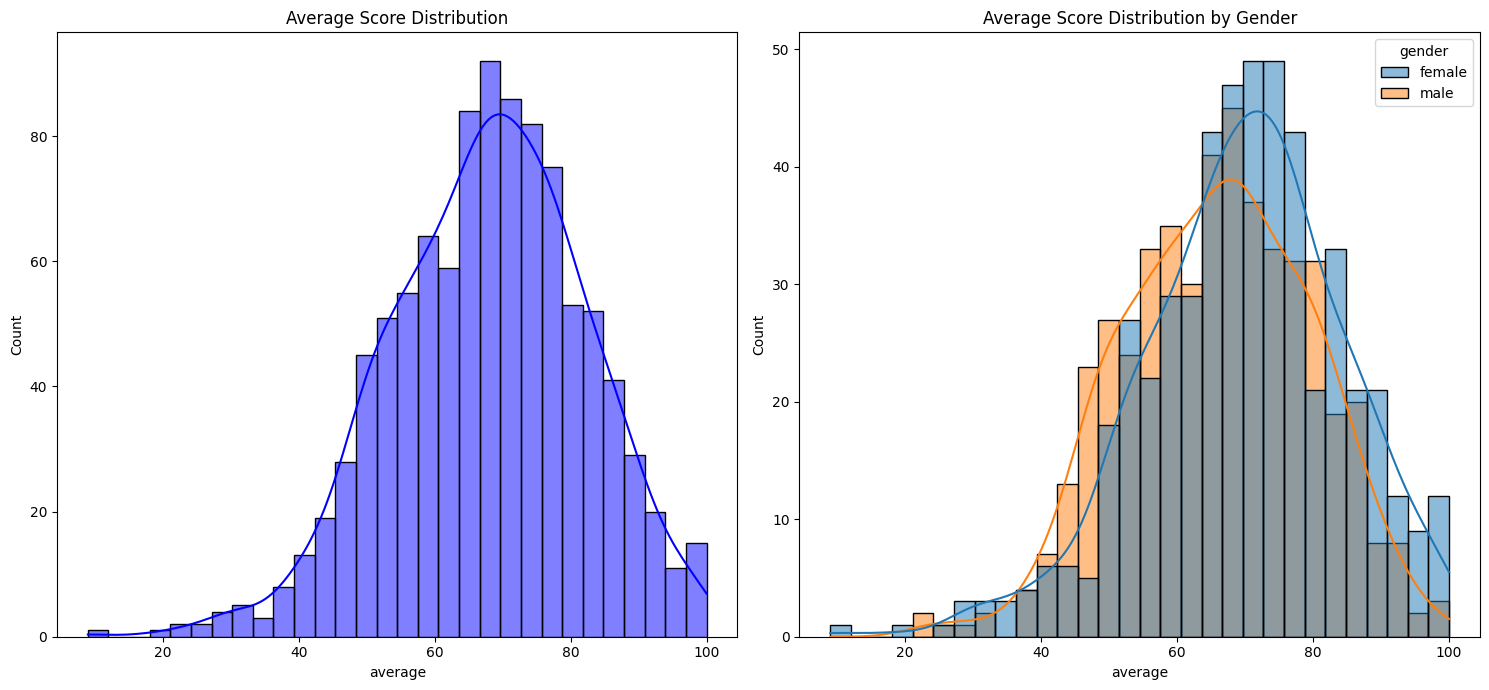

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
sns.histplot(df['average'], kde=True, color='blue', bins=30, ax=axes[0])
axes[0].set_title('Average Score Distribution')
sns.histplot(data=df, x='average', kde=True, color='green', hue='gender', bins=30, ax=axes[1])
axes[1].set_title('Average Score Distribution by Gender')
plt.tight_layout()
plt.show()

insights-

female students tend to perform well than male students

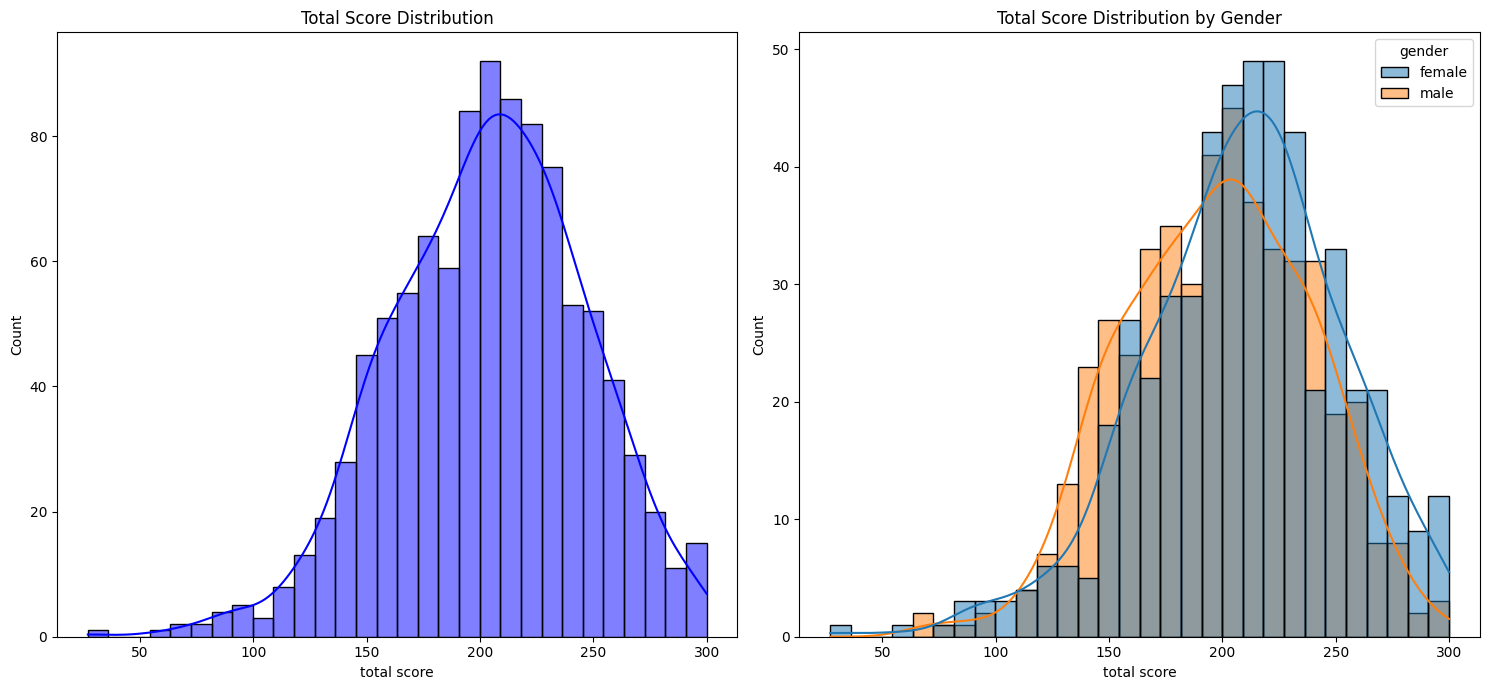

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
sns.histplot(df['total score'], kde=True, color='blue', bins=30, ax=axes[0])
axes[0].set_title('Total Score Distribution')
sns.histplot(data=df, x='total score', kde=True, color='green', hue='gender', bins=30, ax=axes[1])
axes[1].set_title('Total Score Distribution by Gender')
plt.tight_layout()
plt.show()

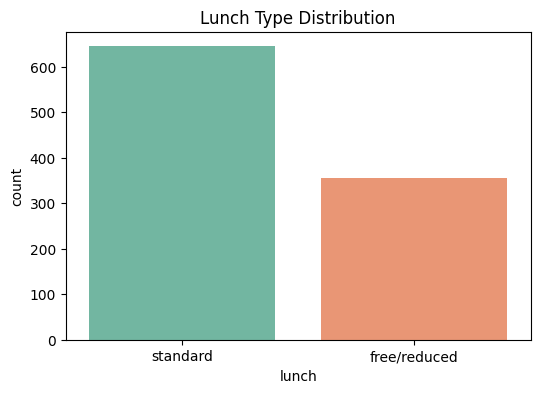

In [42]:
# Univariate Analysis: Lunch Parameter
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='lunch', palette='Set2')
plt.title('Lunch Type Distribution')
plt.show()

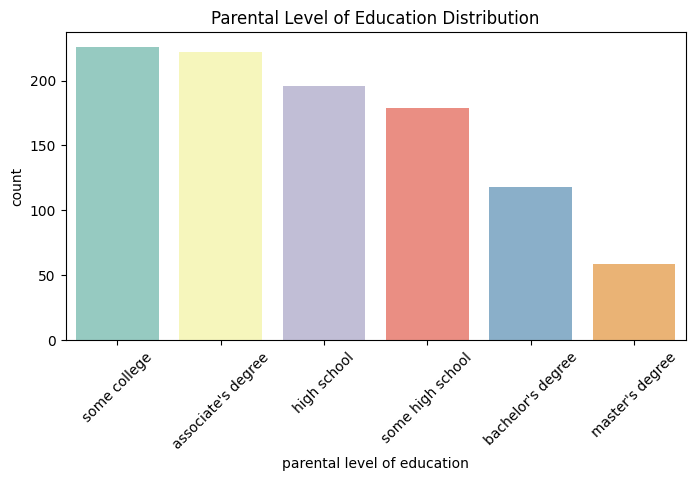

In [43]:
# Univariate Analysis: Parental Level of Education
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='parental level of education', palette='Set3', order=df['parental level of education'].value_counts().index)
plt.title('Parental Level of Education Distribution')
plt.xticks(rotation=45)
plt.show()

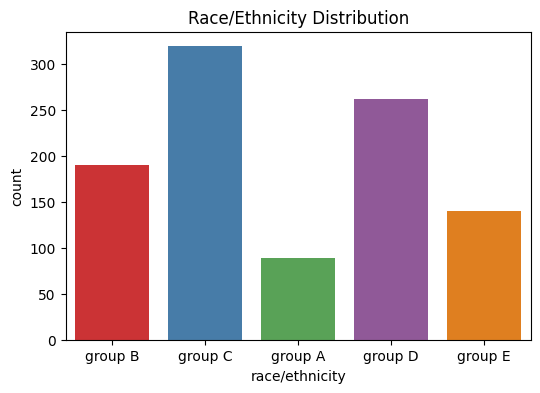

In [44]:
# Univariate Analysis: Race/Ethnicity
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='race/ethnicity', palette='Set1')
plt.title('Race/Ethnicity Distribution')
plt.show()

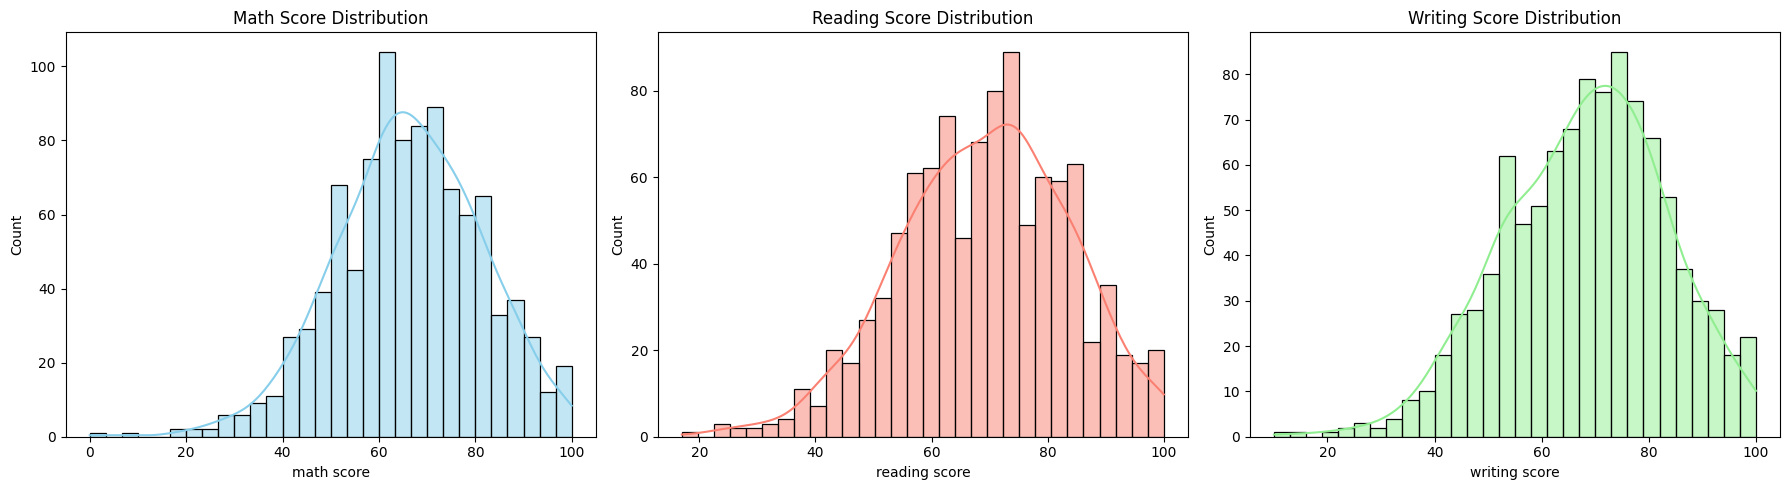

In [45]:
# Univariate Analysis: Math, Reading, Writing Scores
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['math score'], kde=True, color='skyblue', bins=30, ax=axes[0])
axes[0].set_title('Math Score Distribution')
sns.histplot(df['reading score'], kde=True, color='salmon', bins=30, ax=axes[1])
axes[1].set_title('Reading Score Distribution')
sns.histplot(df['writing score'], kde=True, color='lightgreen', bins=30, ax=axes[2])
axes[2].set_title('Writing Score Distribution')
plt.tight_layout()
plt.show()

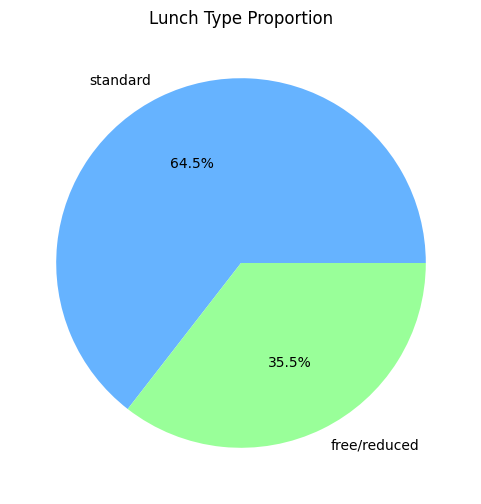

In [46]:
# Pie Plot: Lunch Parameter
plt.figure(figsize=(6,6))
df['lunch'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#66b3ff','#99ff99'])
plt.title('Lunch Type Proportion')
plt.ylabel('')
plt.show()

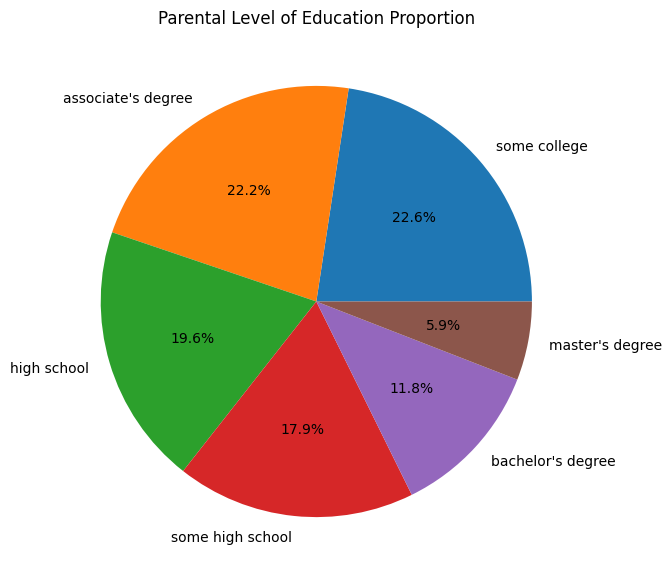

In [47]:
# Pie Plot: Parental Level of Education
plt.figure(figsize=(7,7))
df['parental level of education'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Parental Level of Education Proportion')
plt.ylabel('')
plt.show()

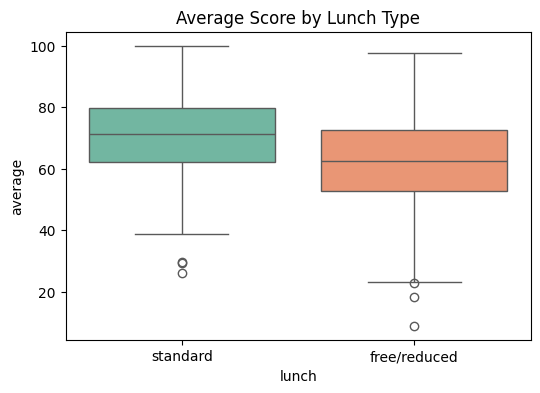

In [48]:
# Bivariate Analysis: Lunch vs Average Score
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='lunch', y='average', palette='Set2')
plt.title('Average Score by Lunch Type')
plt.show()

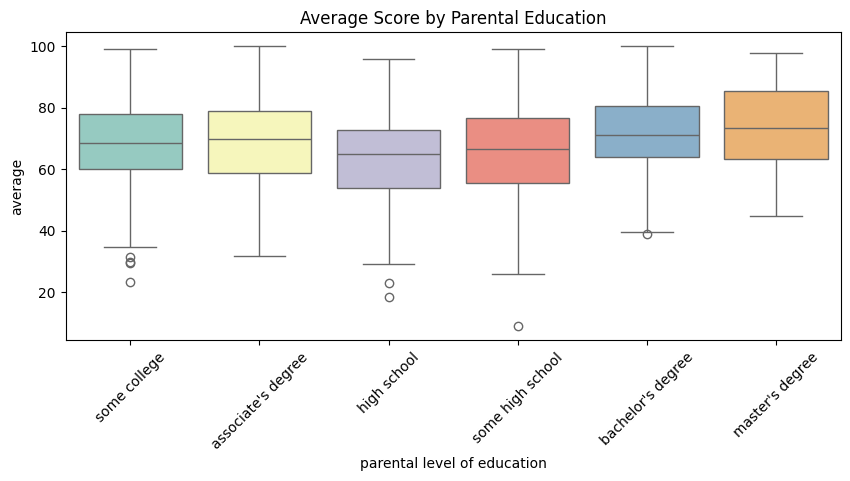

In [49]:
# Bivariate Analysis: Parental Education vs Average Score
plt.figure(figsize=(10,4))
sns.boxplot(data=df, x='parental level of education', y='average', palette='Set3', order=df['parental level of education'].value_counts().index)
plt.title('Average Score by Parental Education')
plt.xticks(rotation=45)
plt.show()

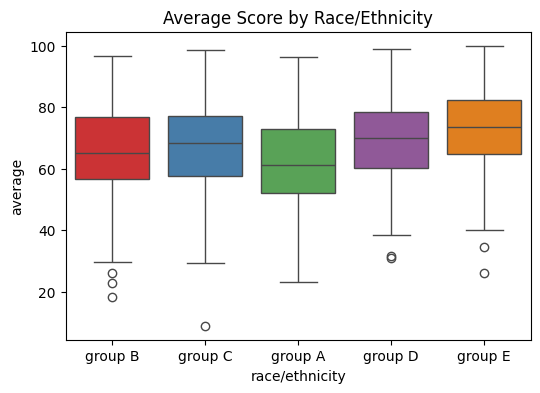

In [50]:
# Bivariate Analysis: Race/Ethnicity vs Average Score
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='race/ethnicity', y='average', palette='Set1')
plt.title('Average Score by Race/Ethnicity')
plt.show()

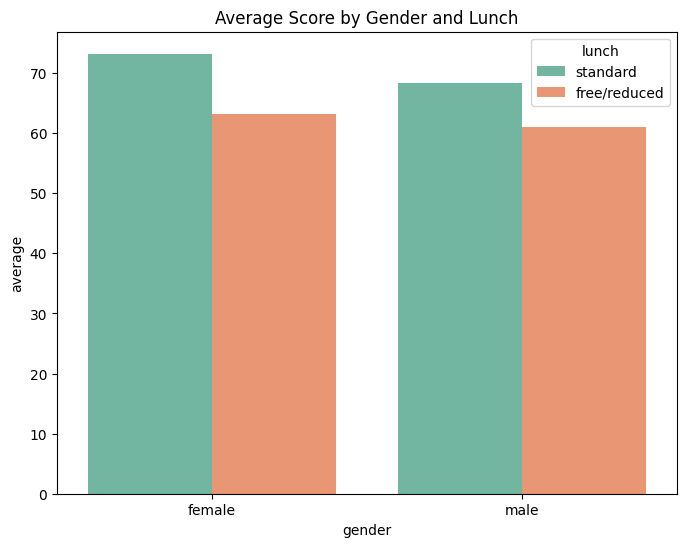

In [51]:
# Multivariate Analysis: Gender, Lunch, and Average Score
plt.figure(figsize=(8,6))
sns.barplot(data=df, x='gender', y='average', hue='lunch', ci=None, palette='Set2')
plt.title('Average Score by Gender and Lunch')
plt.show()

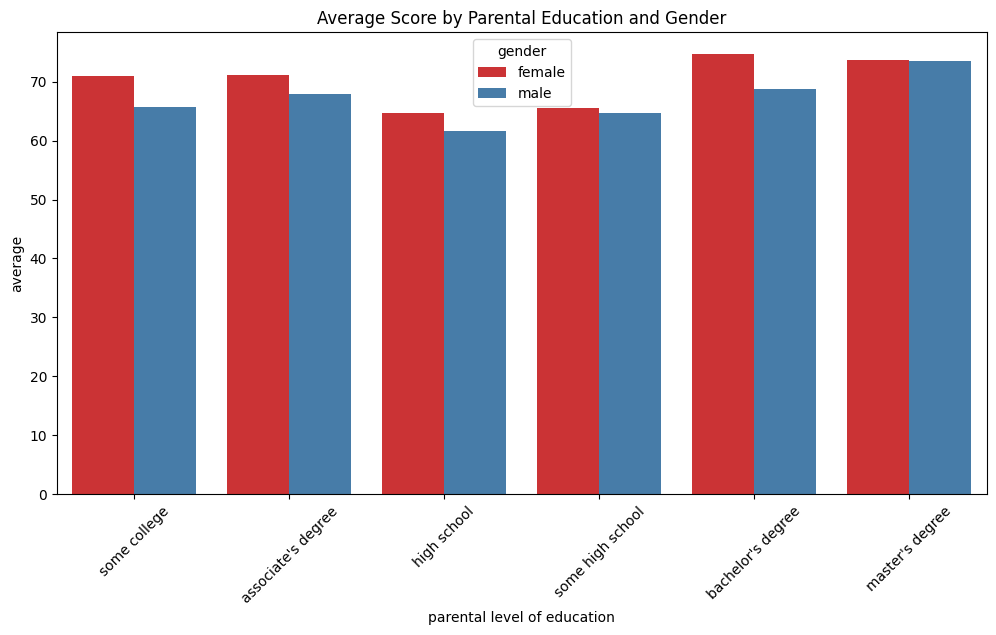

In [52]:
# Multivariate Analysis: Parental Education, Gender, and Average Score
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='parental level of education', y='average', hue='gender', ci=None, palette='Set1', order=df['parental level of education'].value_counts().index)
plt.title('Average Score by Parental Education and Gender')
plt.xticks(rotation=45)
plt.show()

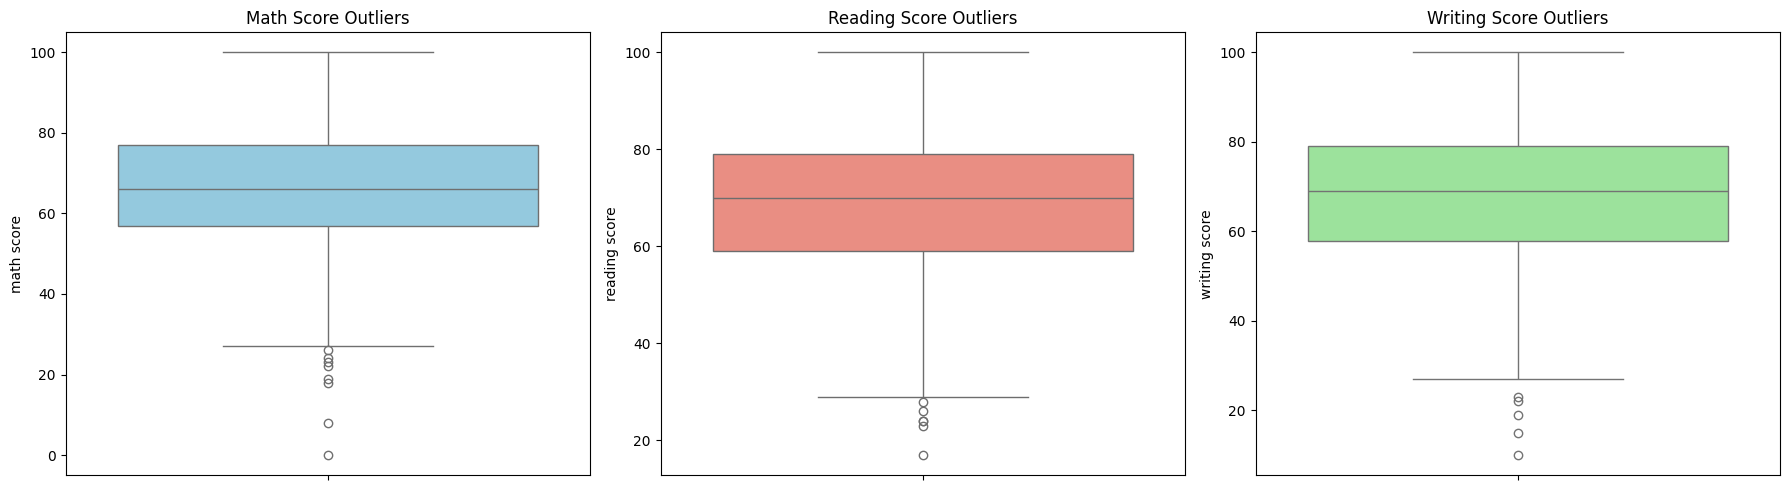

In [53]:
# Checking Outliers: Boxplots for Scores
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.boxplot(y=df['math score'], ax=axes[0], color='skyblue')
axes[0].set_title('Math Score Outliers')
sns.boxplot(y=df['reading score'], ax=axes[1], color='salmon')
axes[1].set_title('Reading Score Outliers')
sns.boxplot(y=df['writing score'], ax=axes[2], color='lightgreen')
axes[2].set_title('Writing Score Outliers')
plt.tight_layout()
plt.show()

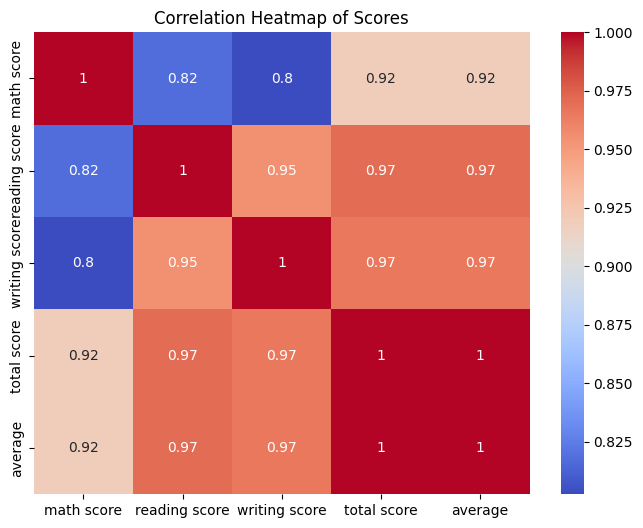

In [54]:
# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[['math score','reading score','writing score','total score','average']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Scores')
plt.show()

## Conclusion

- Students with standard lunch tend to have higher average scores than those with free/reduced lunch.
- Parental level of education shows a positive association with student performance; higher education levels generally correspond to higher average scores.
- There are visible differences in performance across race/ethnicity groups, with some groups performing better on average.
- Gender differences are observed, especially in writing and reading scores, with females often outperforming males.
- Outliers exist in all score distributions, but most students cluster around the mean.
- All three scores (math, reading, writing) are highly correlated, indicating that students who perform well in one subject tend to perform well in others.
- Multivariate analysis reveals that the combination of gender, lunch type, and parental education can further explain variations in student performance.

**Overall, socioeconomic factors, parental education, and gender play significant roles in student academic outcomes. Targeted interventions could help bridge performance gaps.**